In [22]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=20)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

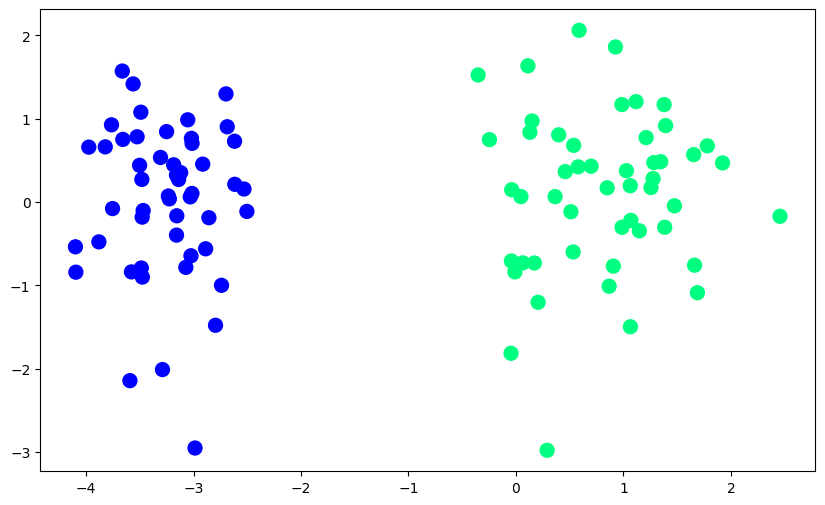

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='none',solver='sag')
lr.fit(X, y)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [26]:
print(lr.coef_)
print(lr.intercept_)

[[4.79964263 0.20826859]]
[5.77303688]


In [27]:
m1 = -(lr.coef_[0][0]/lr.coef_[0][1])
b1 = -(lr.intercept_/lr.coef_[0][1])

In [28]:
x_input = np.linspace(-3, 3, 100)
y_input = m1 * x_input + b1

In [29]:
def gd(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X, weights))
        weights = weights + lr * (np.dot((y - y_hat), X) / X.shape[0])
        
    return weights[1:], weights[0]

In [30]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [31]:
coef_, intercept_ = gd(X, y)

In [32]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [33]:
x_input1 = np.linspace(-3, 3, 100)
y_input1 = m * x_input1 + b

(-3.0, 2.0)

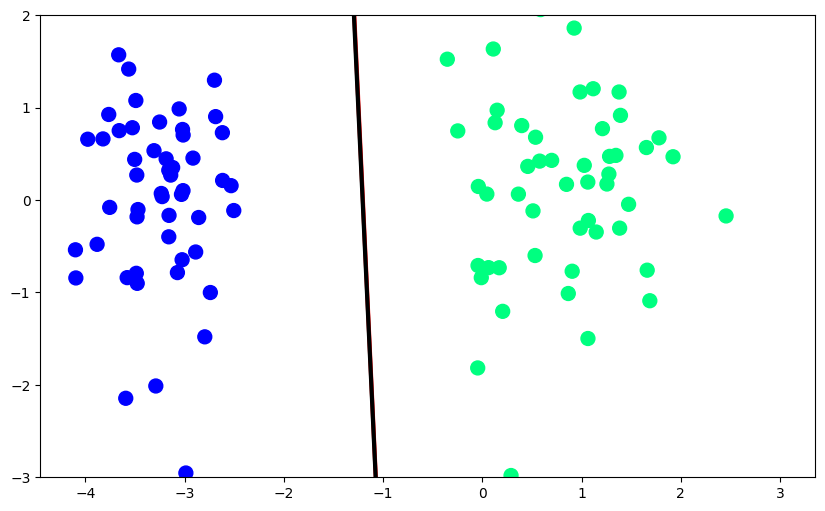

In [34]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)